In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-dataset/sales_data.csv


In [ ]:
# DATA ANALYSIS: to find various trends in the sales of different category of products to determine what factors affect the sales, region wise segregation of buyers. Which channels lead to maximum conversion rate. Which payment methods are used by the customers the most.

In [ ]:
# DATA CLEANING: this ensures that the data for final analysis is free of inconsistencies (such as missing values), which ensures reliability, completeness and accuracy.
# The first step in data cleaning is understanding the data. 

In [2]:
df = pd.read_csv('/kaggle/input/sales-dataset/sales_data.csv')
df.head()   # this function is used to give starting n rows of the data (the default value of n is 5)
# with this function, we can know the general entries in each column. For example, by following o/p, we can know different product categories, regions, sales channels, etc

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [29]:
df.info()   # this gives the basic information about all the dataset columns. For example: range of the database, the datatype of all the columns, total number of values in all of them


# the describe function gives the statistical summary of the dataset, just the numerical columns (example: the mean, median, std, minimum and maximum values in that column)

df.describe() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 3 to 1002
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       1000 non-null   int64  
 1   2       1000 non-null   object 
 2   3       1000 non-null   object 
 3   4       1000 non-null   object 
 4   5       1000 non-null   float64
 5   6       1000 non-null   int64  
 6   7       1000 non-null   object 
 7   8       1000 non-null   float64
 8   9       1000 non-null   float64
 9   10      1000 non-null   object 
 10  11      1000 non-null   float64
 11  12      1000 non-null   object 
 12  13      1000 non-null   object 
 13  14      1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


,1,5,6,8,9,11
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [30]:
# Now, one of the most crucial steps of data cleaning is handling the missing data. It is crucial to prevent the null values affect various results (such as the mean value). Therefore, we either replace the null values with some standard/common value or remove the rows with any null values

df.isnull().sum()

# the following output shows that there is no null value in our data, hence increasing the accuracy of our analysis

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
dtype: int64

In [43]:
# handling duplicates is also equally important for maintaining uniformity
df.index = range(0, len(df))
df.duplicated().sum # this will give the total number of duplicated rows in the dataset
# the following output shows that there are no duplicates in the dataset

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool>

In [48]:
# handling the data types (for handling different formats of the datatype, it is important to know what kind of values exist in our dataset)
df.dtypes
# this function gives the datatype of all the columns in our dataset

Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

<Axes: xlabel='Discount'>

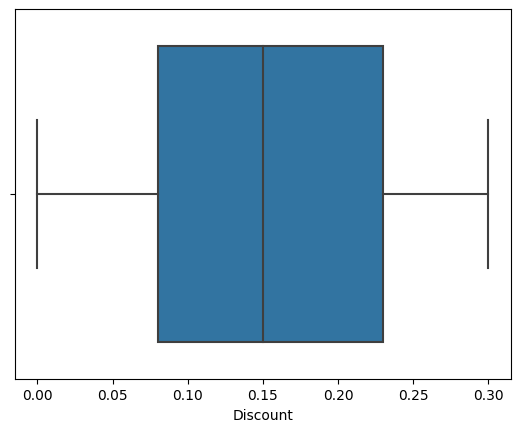

In [6]:
# the next step in data cleaning is handling the outliers. Outliers are the extremeties. For this, we can use the boxplot (under the seaborn library) to identify the outliers

# sns.boxplot(x = df["Sales_Amount"])
# the following graph shows that all the sales amount lies iunder the range of 2500-7500 hence, no outliers in the sales amount
# sns.boxplot(x = df["Quantity_Sold"])

# sns.boxplot(x = df["Unit_Cost"])
sns.boxplot(x = df["Discount"])


# hence all the data is concentrated uniformly, and no outliers are present in any category, Hence, one less step !!!

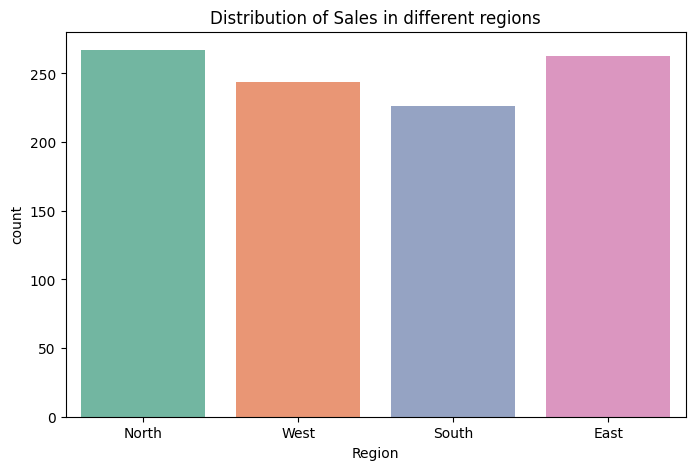

In [28]:
# Now, the next part of our analysis is EDA (Exploratory Data Analysis), and DATA VISUALISATION
# The process of using the statistical and visualisation techniques to analyse the data is known as EDA. This helps in identifying the trends, patterns and relationships in data

# Lets start with the univariate analysis
# We can use graphs like: histogram, boxplot, KDE plot, barchart, violin plot, piechart for univariate analysis
# this analysis is done on the basis of category (numerical/categorical) data
# 1. for numerical data:
# -> countplot for the Region
plt.figure(figsize = (8,5))
sns.countplot(x = df['Region'], palette = 'Set2')
plt.title('Distribution of Sales in different regions')
plt.show()

# Hence, from this countplot, we can infer that the maximum sales occuer in North region, followed by 

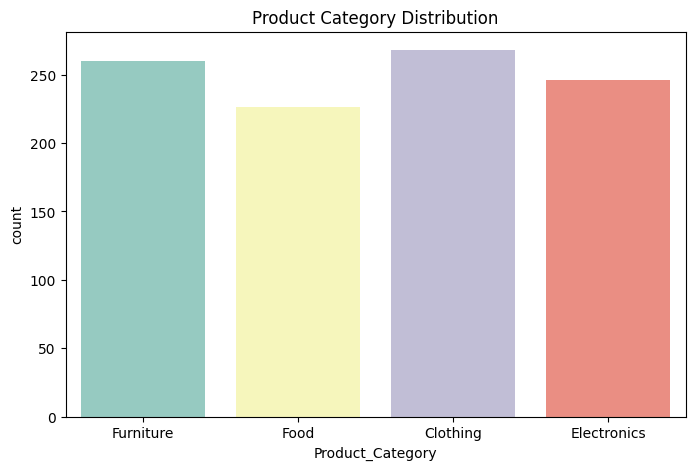

In [20]:
# Now lets analyse which product category is sold the most
plt.figure(figsize=(8,5))
sns.countplot(x=df['Product_Category'], palette='Set3')
plt.title("Product Category Distribution")
plt.show()
# hence, clothing products are sold the most, followed by furniture, then electronics and then foood
# hence, till now we have inferred that most of the sales are done in North region, in the clothing category



In [21]:
df["Customer_Type"].unique()

array(['Returning', 'New'], dtype=object)

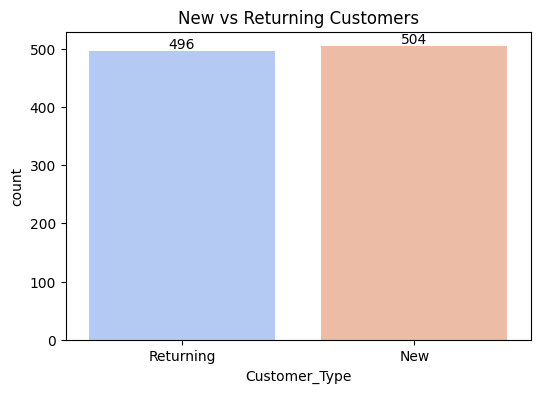

In [23]:
# Lets analyse the customer type now. How many customers are Returning, and how many of them are new
plt.figure(figsize=(6,4))
ax = sns.countplot(x=df['Customer_Type'], palette='coolwarm')

# Add labels using bar_label
ax.bar_label(ax.containers[0]) # ax.containers() is used to access the bar of the chart

plt.title("New vs Returning Customers")
plt.show()

# Hence, the returning customers are slightly less than the new customers


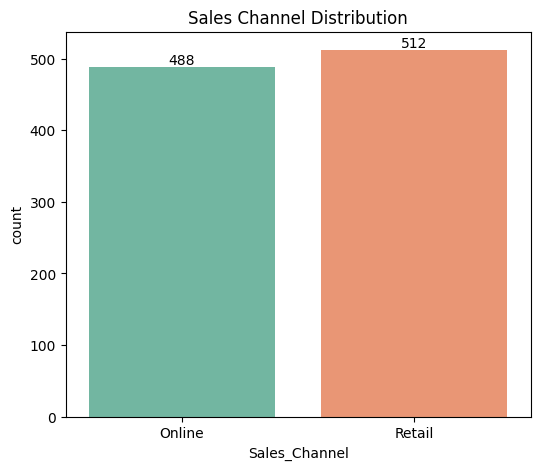

In [31]:
# Lets figure out which sales channel brings in the most of the sales (online/offline)

plt.figure(figsize = (6,5))
ax = sns.countplot(x = df['Sales_Channel'], palette= 'Set2')
ax.bar_label(ax.containers[0])
plt.title('Sales Channel Distribution')
plt.show()

# Thus, retail sales is more than the online sales

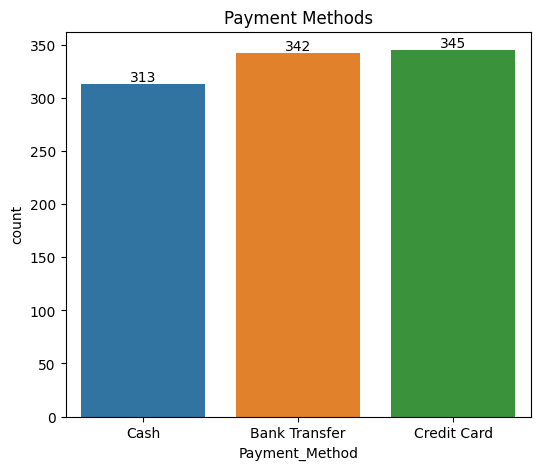

In [33]:
# Similarly, we will see which payment method are people using more

plt.figure(figsize = (6,5))
ax = sns.countplot(x = df['Payment_Method'])
ax.bar_label(ax.containers[0])
plt.title('Payment Methods')
plt.show()

# hence, we can also calculate the percentages of this by using:



In [36]:
counts = df['Payment_Method'].value_counts()
percentages = df['Payment_Method'].value_counts(normalize=True) * 100

# Combine both into a DataFrame for easy viewing
customer_stats = pd.DataFrame({'Count': counts, 'Percentage': percentages})
print(customer_stats)

                Count  Percentage
Payment_Method                   
Credit Card       345        34.5
Bank Transfer     342        34.2
Cash              313        31.3


In [5]:
# BIVARIATE ANALYSIS: This is used to compare two aspects, for example, we can see how discount affects the unit cost
# various charts used for this are: scatter plot, line plot, barchart,boxplot

# for performing the bivariate analysis, we need to know whether the data is categorical, or numerical. This can be known by the following command:
df.dtypes


Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

               Sales_Amount  Quantity_Sold  Discount
Sales_Amount       1.000000      -0.041599  0.023153
Quantity_Sold     -0.041599       1.000000 -0.007806
Discount           0.023153      -0.007806  1.000000


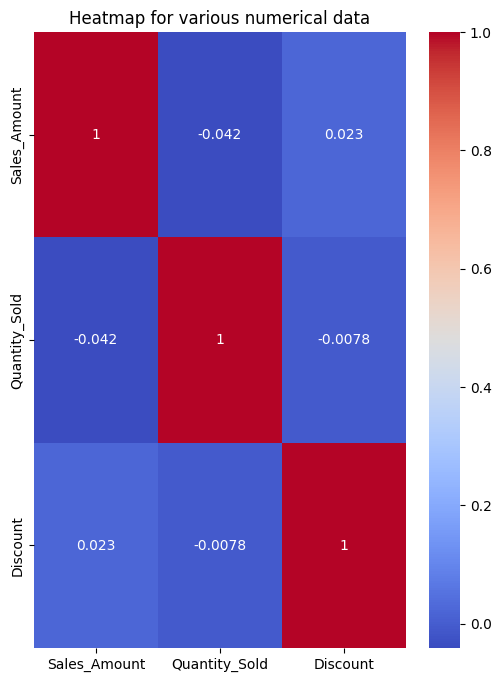

In [6]:
# for categorical data, we can use the countplot, stacked bar chart, mosaic plot, etc
# for numerical data, we will use scatterplot,lineplot, barchart, boxplot

# We can perform the analysis as:

#1. For numerical data, we will use a correlation matrix and a heatmap(it gives the degree of dependency of two variables):


print(df[['Sales_Amount', 'Quantity_Sold','Discount']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold','Discount']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

# here, all the values are very less than one, hence this indicates that no value is highly dependent, or proportional to the other value
# for example: if values A and B have a correlation of +0.8, this means that the increase of A leads to increase of B (that means, directly proportional)
# similarly, if they have a correlation of -.9, it signifies inverse proportional relation


print(df[['Sales_Amount', 'Quantity_Sold','Unit_Cost']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold','Unit_Cost']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

               Sales_Amount  Quantity_Sold  Unit_Cost
Sales_Amount       1.000000      -0.041599   0.009770
Quantity_Sold     -0.041599       1.000000   0.053888
Unit_Cost          0.009770       0.053888   1.000000


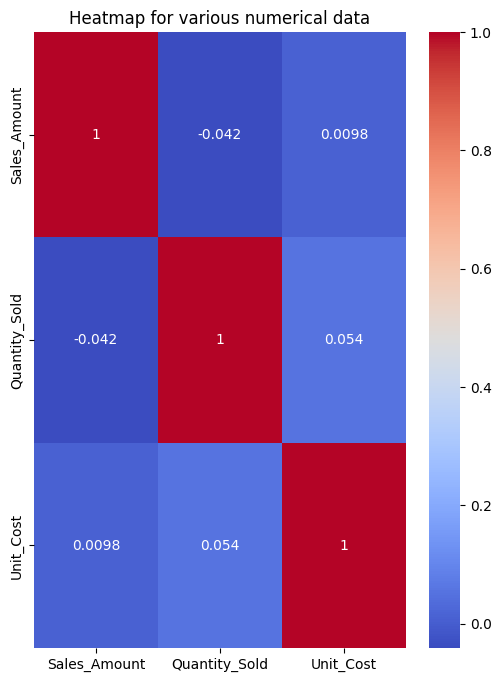

In [7]:
print(df[['Sales_Amount', 'Quantity_Sold','Unit_Cost']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold','Unit_Cost']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

               Sales_Amount  Quantity_Sold  Unit_Price
Sales_Amount       1.000000      -0.041599    0.011812
Quantity_Sold     -0.041599       1.000000    0.057296
Unit_Price         0.011812       0.057296    1.000000


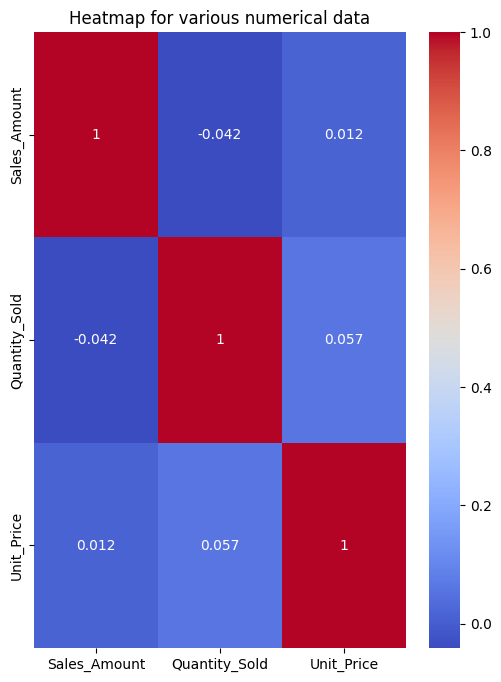

In [8]:
print(df[['Sales_Amount', 'Quantity_Sold','Unit_Price']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold','Unit_Price']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

              Sales_Amount  Unit_Price  Unit_Cost
Sales_Amount      1.000000    0.011812   0.009770
Unit_Price        0.011812    1.000000   0.995056
Unit_Cost         0.009770    0.995056   1.000000


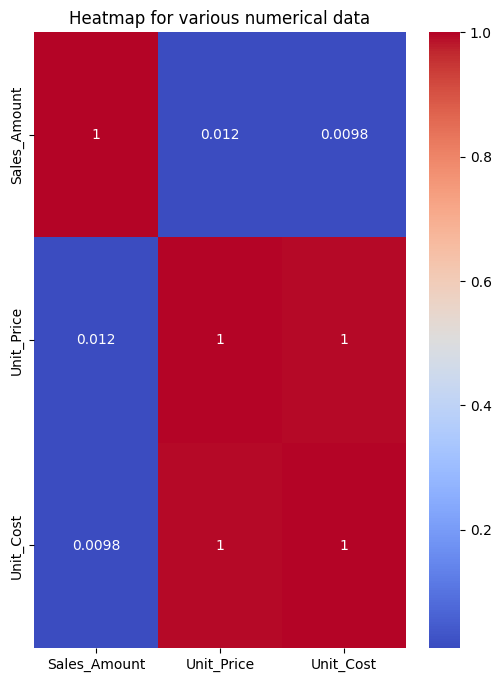

In [9]:
print(df[['Sales_Amount', 'Unit_Price','Unit_Cost']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Unit_Price','Unit_Cost']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

# this is known to us that the increase in price will lead to increase in cost as well.This is shown in the graph below

               Sales_Amount  Quantity_Sold  Discount
Sales_Amount       1.000000      -0.041599  0.023153
Quantity_Sold     -0.041599       1.000000 -0.007806
Discount           0.023153      -0.007806  1.000000


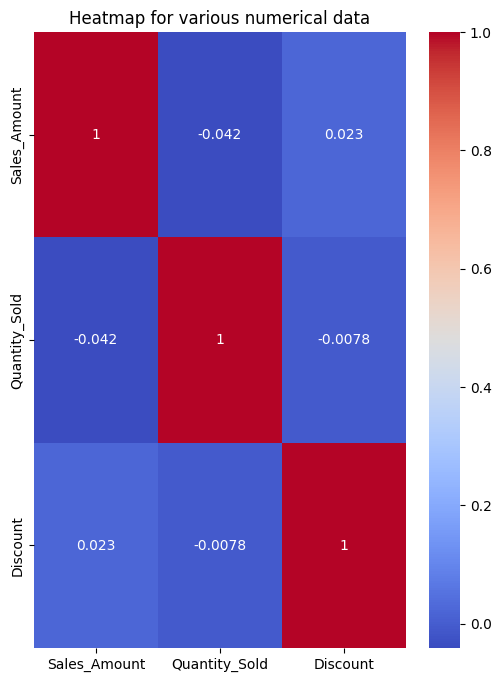

In [10]:
# Let us check the correlation between sales price, discount, and sales amount now (I feel the sales amount must be correlated to the discount)
print(df[['Sales_Amount', 'Quantity_Sold','Discount']].corr())
plt.figure(figsize = (6,8))
sns.heatmap(df[['Sales_Amount', 'Quantity_Sold','Discount']].corr(),annot = True, cmap= 'coolwarm')
plt.title('Heatmap for various numerical data')
plt.show()

# Now, to my surprise, the quantity sold is not at all related to the discount offered

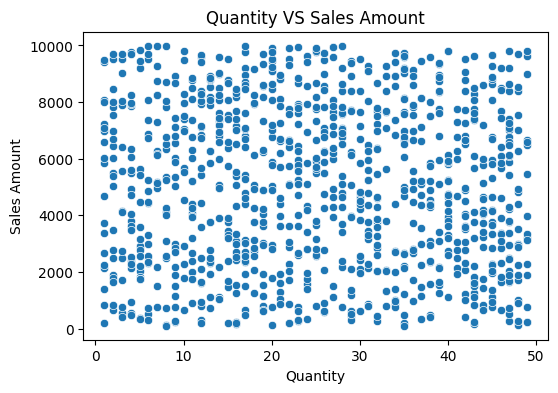

In [13]:
# Let us plot a scatter plot to see how things vary, and are dependent on each other

plt.figure(figsize = (6,4))
sns.scatterplot(y = df['Sales_Amount'], x = df['Quantity_Sold'])
plt.xlabel('Quantity')
plt.ylabel('Sales Amount')
plt.title('Quantity VS Sales Amount')
plt.show()
# The following graph shows that there is a random distribution, therefore, the quantity has no clear affect on the sales amount

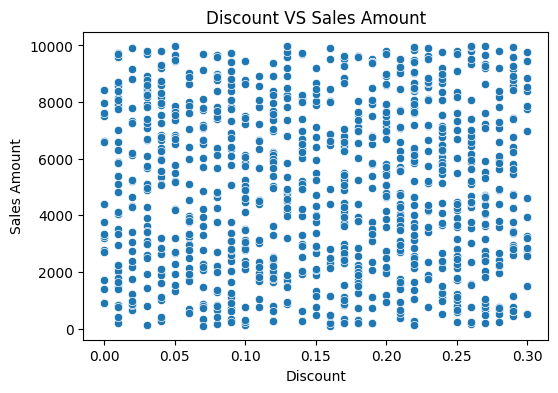

In [14]:
plt.figure(figsize = (6,4))
sns.scatterplot(y = df['Sales_Amount'], x = df['Discount'])
plt.xlabel('Discount')
plt.ylabel('Sales Amount')
plt.title('Discount VS Sales Amount')
plt.show()

# this is also uniformly distributed, hence no affect of sales on discount, and vice-versa

<Axes: xlabel='Quantity_Sold', ylabel='Sales_Amount'>

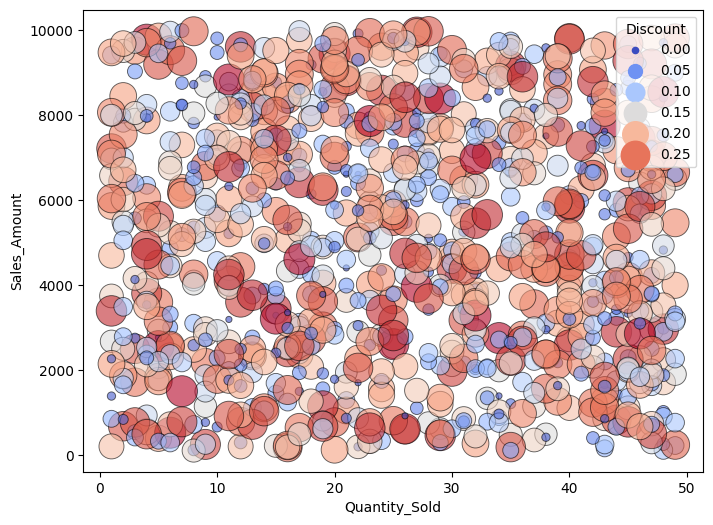

In [17]:
# Bubblechart:
# it is used for multivariate analysis. Lets plot a bubblechart for quantity sold, discount, and sales amount

plt.figure(figsize = (8,6))
sns.scatterplot(x = df['Quantity_Sold'], y = df['Sales_Amount'], size = df['Discount'], hue = df['Discount'], sizes=(20, 500), palette='coolwarm',alpha=0.6,edgecolor="black")
# The following graph confused me alot, I will go for pairplot now

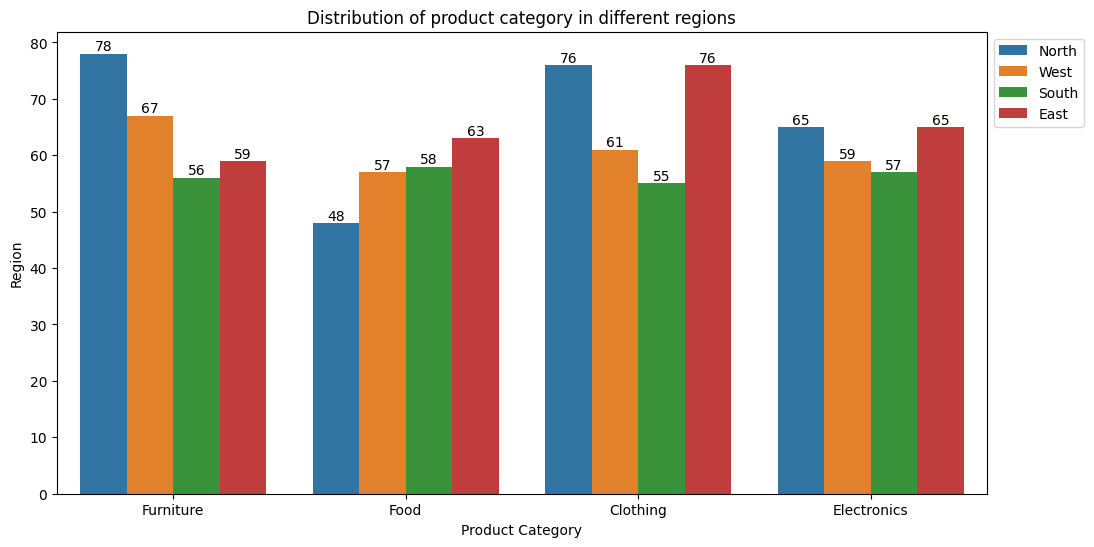

In [27]:
# to plot a countplot to check the distribution of product in different regions

plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Region')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
plt.title('Distribution of product category in different regions')
plt.xlabel('Product Category')
plt.ylabel('Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show(ax)

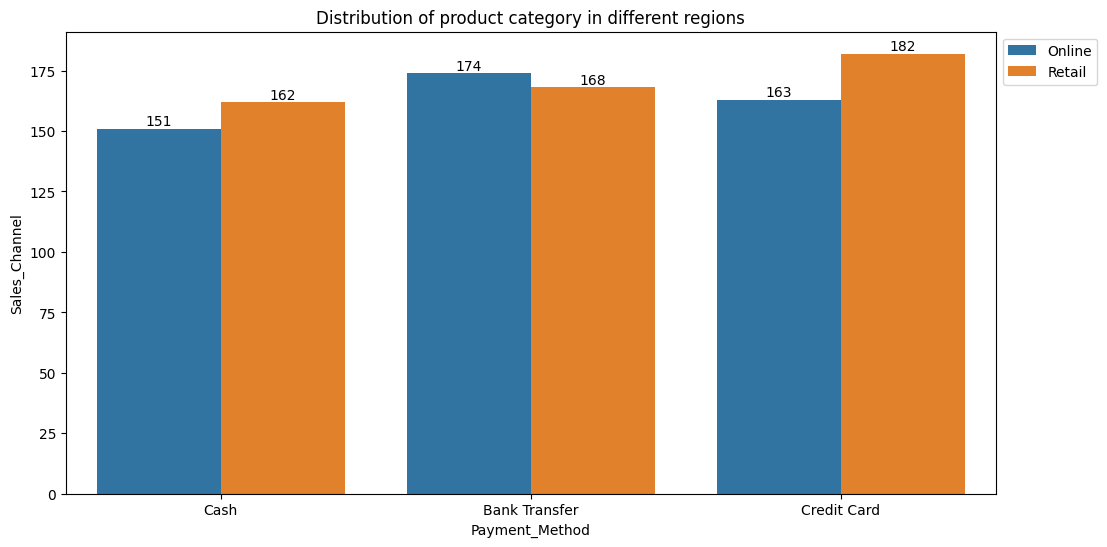

In [29]:
# to check which payment method is used in different sales channel

plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = 'Payment_Method', hue = 'Sales_Channel')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Distribution of product category in different regions')
plt.xlabel('Payment_Method')
plt.ylabel('Sales_Channel')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show(ax)


# The following graph shows that in retail channel, cash is used more compared to online method in bank transfer, and credit card

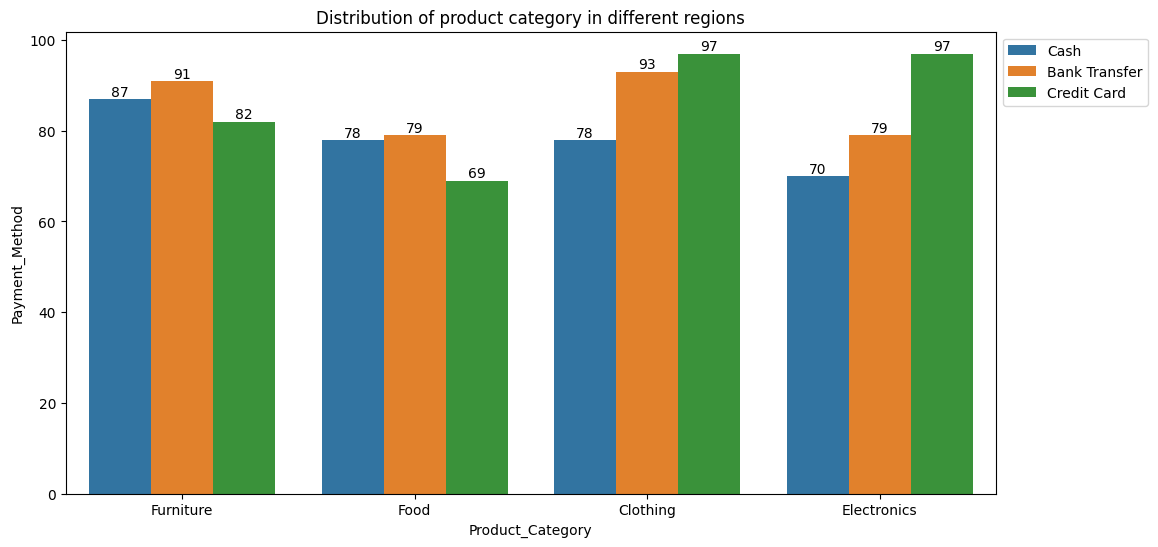

In [32]:
# PRODUCT CATEGORY VS SALES CHANNEL

plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Payment_Method')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Distribution of product category in different regions')
plt.xlabel('Product_Category')
plt.ylabel('Payment_Method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show(ax)
# This shows us that while buying electronics and clothing, people use creditcard the most, compared to its least usability in purchasing food and furniture


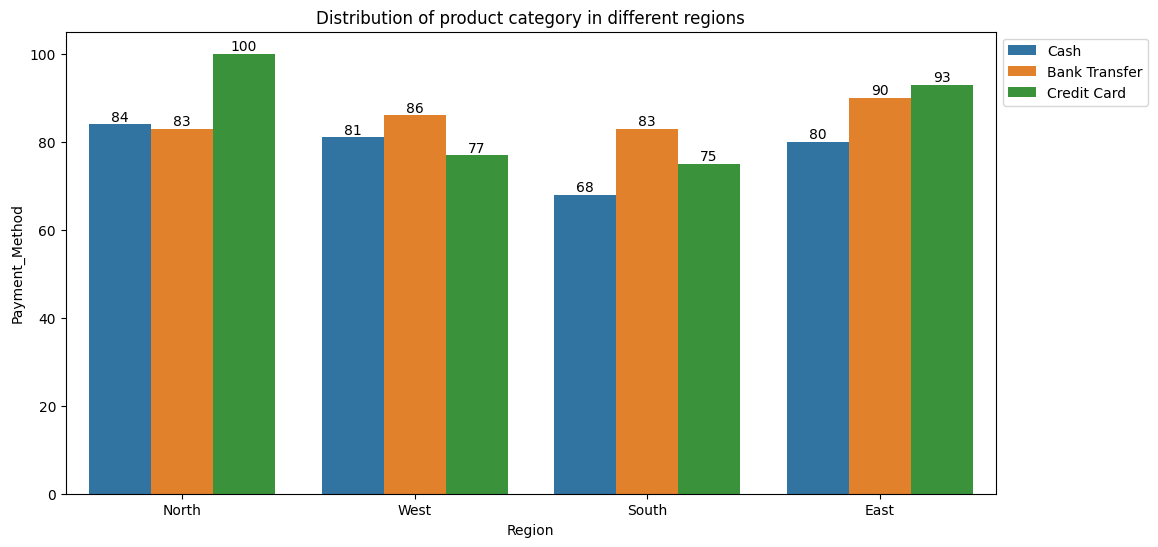

In [34]:
plt.figure(figsize = (12,6))
ax = sns.countplot(data = df, x = 'Region', hue = 'Payment_Method')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.title('Distribution of product category in different regions')
plt.xlabel('Region')
plt.ylabel('Payment_Method')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show(ax)

# the following graph shows that in North region, credit card is used the most, while its usage is still the least in west Cash is still used by many people,but it is the most least used MOD in almost all the regions.This shows that people are relying more on the credit cards and bank transfer (ie: electronic MP)




In [35]:
# Now, this is enough of data visualisation and EDA, now moving towards feature engineering:
# 1. Feature engineering is the step where we extract new features from our data (basically creating a new column), which is more relevant to us
df.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [51]:
#for example: from the date's column, we can extract the months in which the sale is made, to give a broader insight, thereafter, we can calculate in which month, which category sales occured the most

df['Month'] = pd.to_datetime(df['Sale_Date']).dt.month

# similarly,I will find the year
df['Year'] = pd.to_datetime(df['Sale_Date']).dt.year
df.describe() 
df['Month'].value_counts().idxmax() # this shows that maximum number of sales are made in the first (January) month
# df['Year'].value_counts() # counts the sales in each year

1

In [54]:
# We can also generate the revenue from our data as:

df['Revenue'] = df['Sales_Amount'] * df['Quantity_Sold']
print(df['Revenue'])

# now this can be used to analyse the terms related with the revenue generated

0       90971.46
1       74528.34
2      138936.90
3       84549.66
4       48752.60
         ...    
995     18935.52
996    174505.32
997    129704.90
998     63549.33
999    236348.64
Name: Revenue, Length: 1000, dtype: float64


In [ ]:
# Now, from the above features, we can make statistical insights and results for our data.

df[]